In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipympl

# Load the CSV files
train_annotations = pd.read_csv('oidv6-train-annotations-bbox.csv')
class_descriptions = pd.read_csv('oidv7-class-descriptions-boxable.csv')
val_annotation = pd.read_csv('validation-annotations-bbox.csv')
test_annotation = pd.read_csv('test-annotations-bbox.csv')


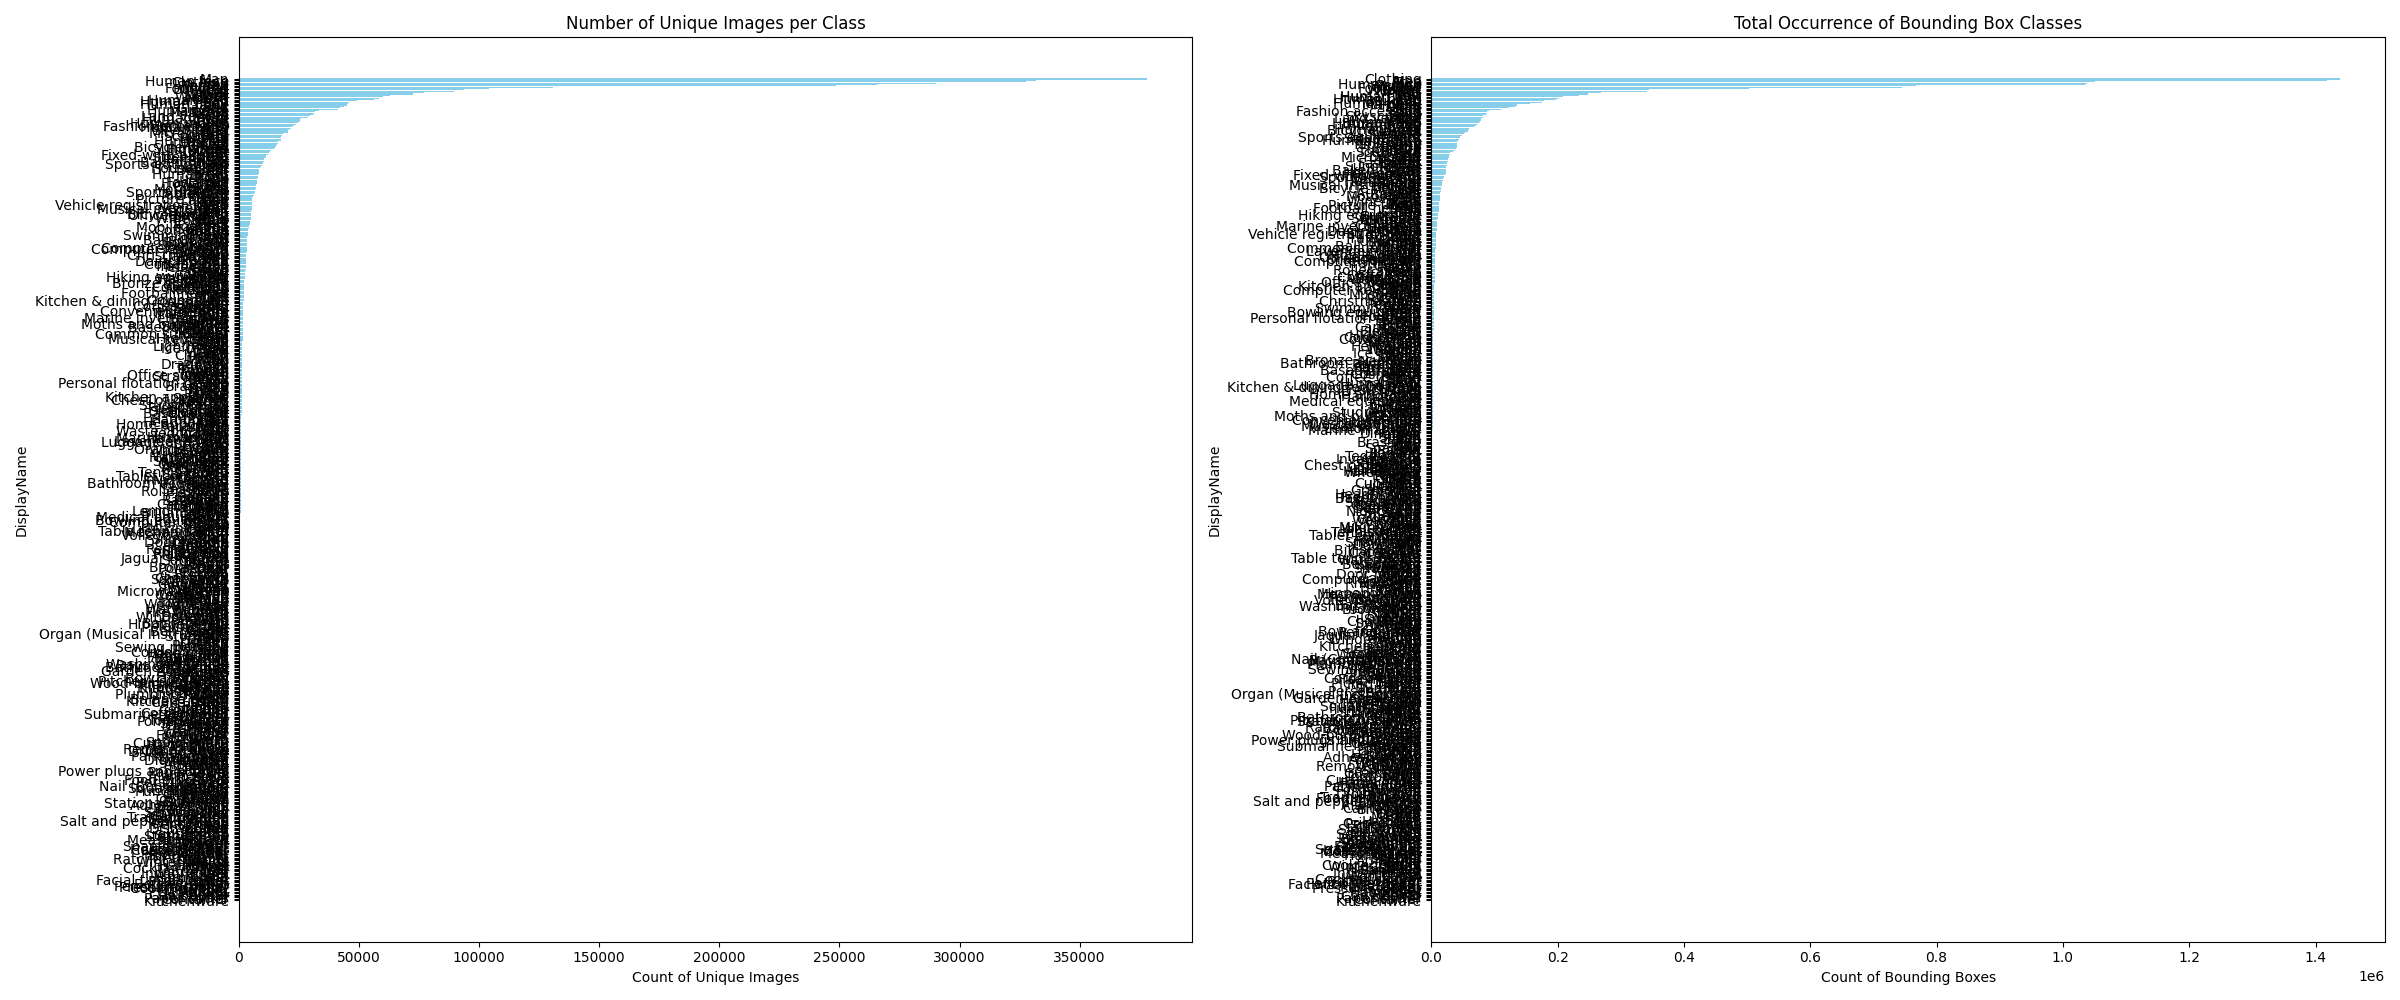

In [2]:
'''
# Count occurrences of each LabelName in the train dataset
label_counts = train_annotations['LabelName'].value_counts().reset_index()
label_counts.columns = ['LabelName', 'Count']

# Count unique ImageIDs for each LabelName
image_counts = train_annotations.groupby('LabelName')['ImageID'].nunique().reset_index()
image_counts.columns = ['LabelName', 'image_count']

# Add bbox_count and image_count columns to class_descriptions by merging
class_descriptions = pd.merge(
    class_descriptions, 
    label_counts, 
    on='LabelName', 
    how='left'
)

class_descriptions = pd.merge(
    class_descriptions,
    image_counts,
    on='LabelName',
    how='left'
)

# Rename 'Count' column to 'bbox_count'
class_descriptions = class_descriptions.rename(columns={'Count': 'bbox_count'})

# Fill NaN values with 0 for classes that don't appear in training set
class_descriptions['bbox_count'] = class_descriptions['bbox_count'].fillna(0)
class_descriptions['image_count'] = class_descriptions['image_count'].fillna(0)

# Save the updated class descriptions back to CSV
class_descriptions.to_csv('oidv7-class-descriptions-boxable.csv', index=False)
'''
# Enable interactive plots
%matplotlib widget

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

# Sort data for both plots
bbox_sorted = class_descriptions.sort_values('bbox_count')
image_sorted = class_descriptions.sort_values('image_count')

# Plot 1: Bounding Box Count
ax2.barh(bbox_sorted['DisplayName'], bbox_sorted['bbox_count'], color='skyblue')
ax2.set_xlabel('Count of Bounding Boxes')
ax2.set_ylabel('DisplayName')
ax2.set_title('Total Occurrence of Bounding Box Classes')

# Plot 2: Image Count
ax1.barh(image_sorted['DisplayName'], image_sorted['image_count'], color='skyblue')
ax1.set_xlabel('Count of Unique Images')
ax1.set_ylabel('DisplayName')
ax1.set_title('Number of Unique Images per Class')

# Adjust layout
plt.tight_layout()
plt.show()




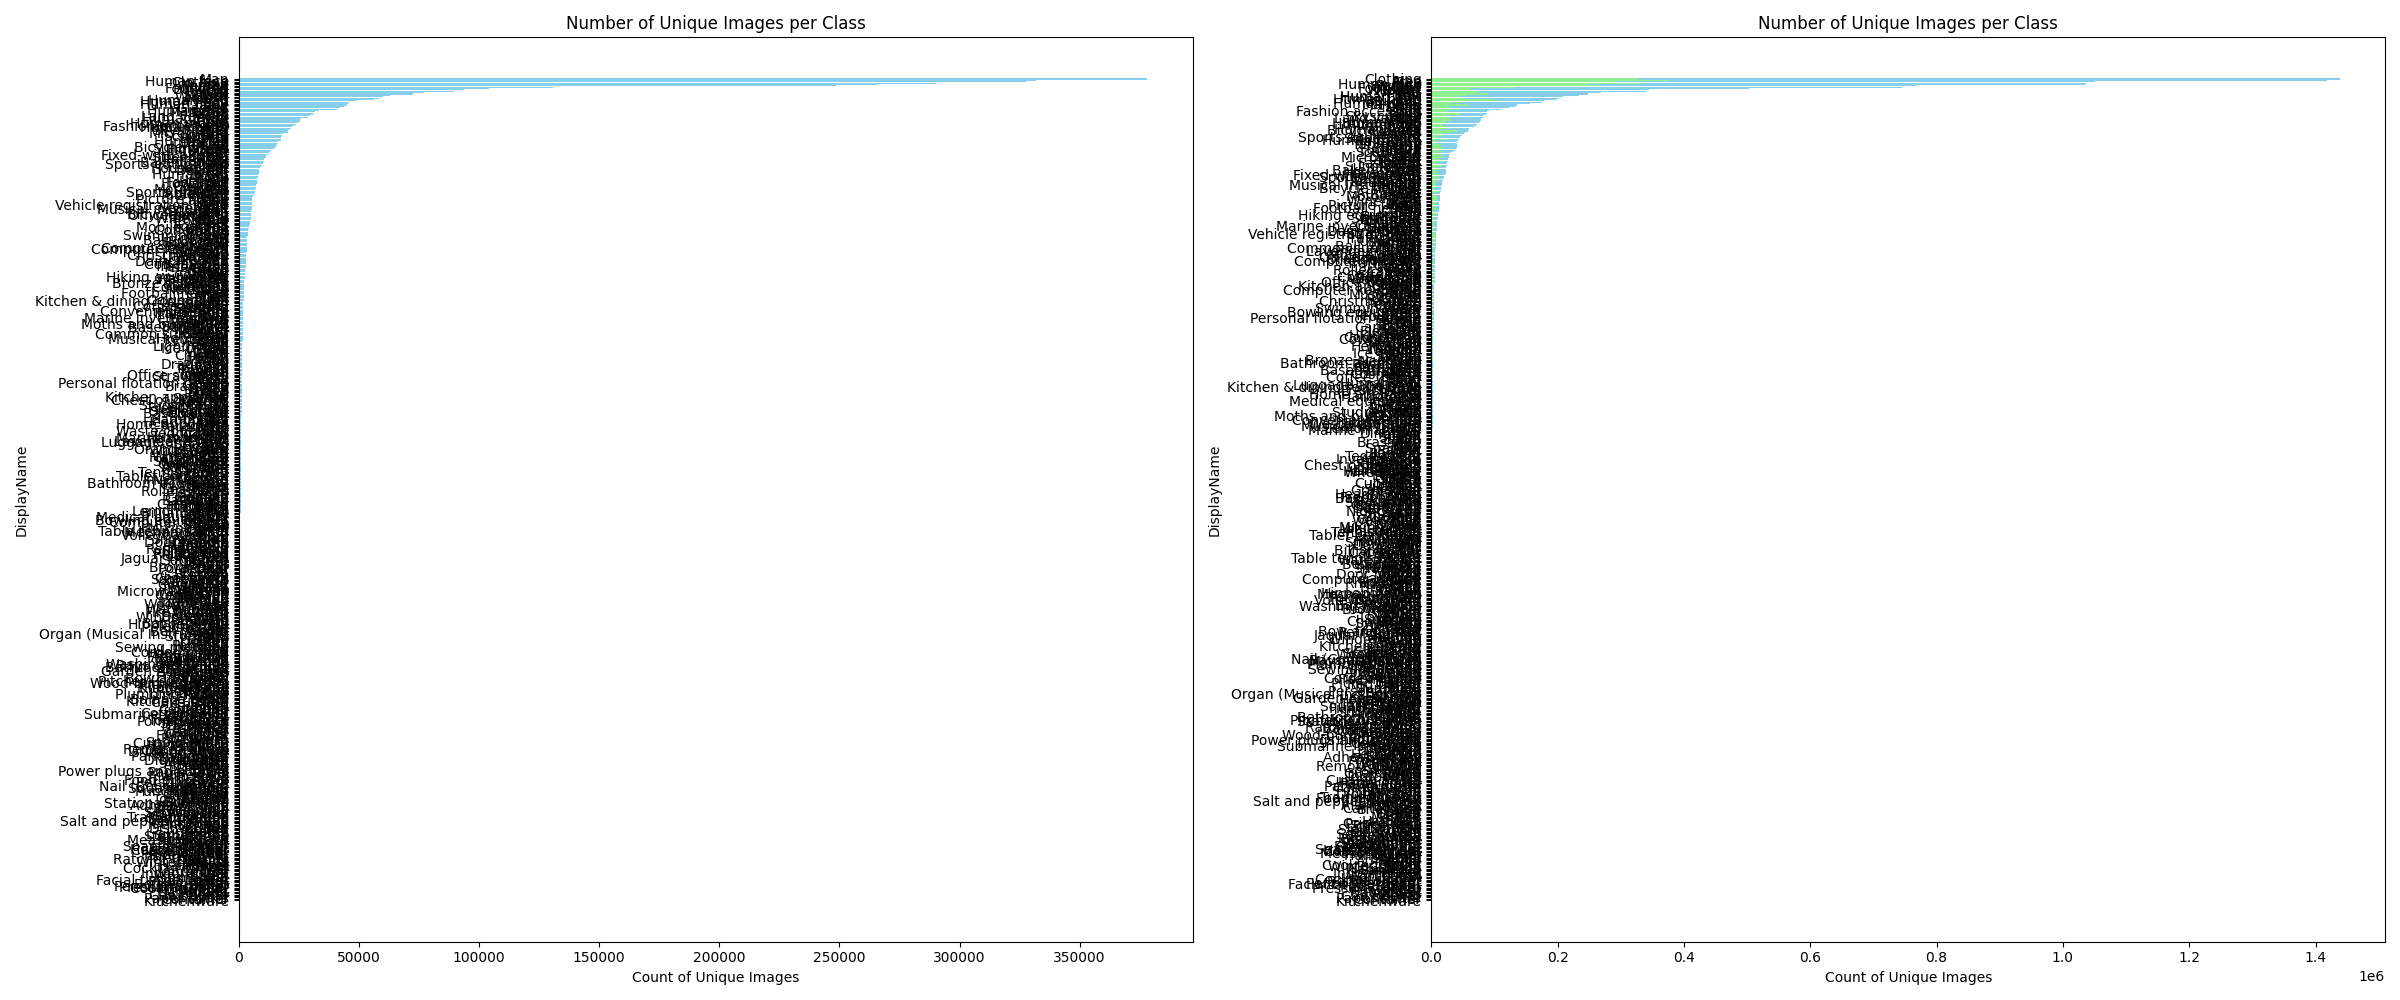

In [3]:
# Plot 2: Image Count
ax2.barh(image_sorted['DisplayName'], image_sorted['image_count'], color='lightgreen')
ax2.set_xlabel('Count of Unique Images')
ax2.set_ylabel('DisplayName')
ax2.set_title('Number of Unique Images per Class')

# Adjust layout
plt.tight_layout()
plt.show()

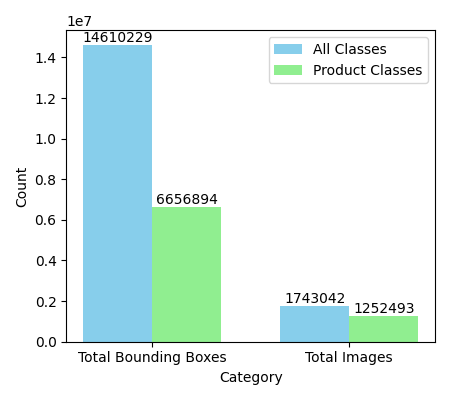

In [17]:
# Create bar chart comparing count of images and bounding boxes between all classes and product classes

# Calculate total bounding boxes (total rows)
total_bounding_boxes = len(train_annotations)

# Calculate total unique ImageID's
total_unique_images = train_annotations['ImageID'].nunique()

# Plot bar chart for total number of bounding boxes and images for product classes

# Filter class descriptions to include only products (IsProduct == TRUE)
product_classes = class_descriptions[class_descriptions['IsProduct'] == True]

# Merge the product classes with the train annotations to get product-related bounding boxes
product_bounding_boxes = pd.merge(train_annotations, product_classes, on='LabelName')

# Calculate total bounding boxes (rows) for products only
total_bounding_boxes_products = len(product_bounding_boxes)

# Calculate total unique ImageID's for products only
total_unique_images_products = product_bounding_boxes['ImageID'].nunique()

# Data for plotting
labels = ['Total Bounding Boxes', 'Total Images']
all_class_counts = [total_bounding_boxes, total_unique_images]
product_class_counts = [total_bounding_boxes_products, total_unique_images_products]

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(4.5, 4))

# Set bar width and x positions for groups
bar_width = 0.35
x = range(len(labels))

# Plot bars for all classes and product classes
bars1 = ax.bar(x, all_class_counts, width=bar_width, label='All Classes', color='skyblue')
bars2 = ax.bar([p + bar_width for p in x], product_class_counts, width=bar_width, label='Product Classes', color='lightgreen')

# Add labels, title, and x-tick labels
ax.set_xlabel('Category')
ax.set_ylabel('Count')
#ax.set_title('Training dataset size: All Classes vs Product Classes')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(labels)

# Add legend
ax.legend()

# Add the count numbers on top of each bar
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

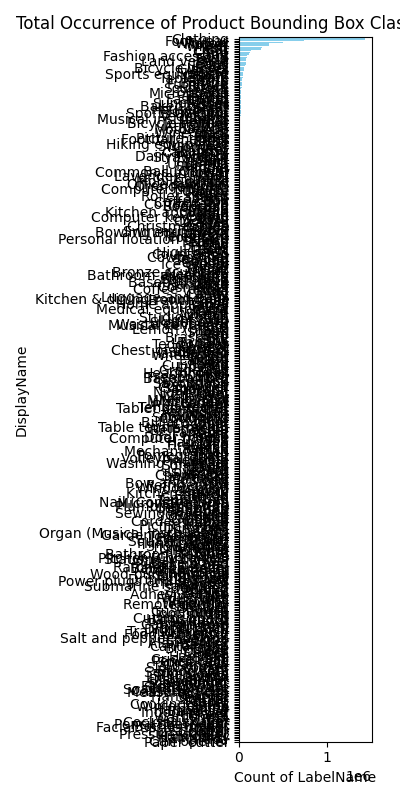

In [6]:
# Filter the class descriptions to include only products (IsProduct == TRUE)
product_classes = class_descriptions[class_descriptions['IsProduct'] == True]

# Count occurrences of each LabelName in the train dataset
label_counts = train_annotations['LabelName'].value_counts().reset_index()
label_counts.columns = ['LabelName', 'Count']

# Merge with the product classes only to get product-related bounding boxes
merged_data = pd.merge(label_counts, product_classes, on='LabelName')

# Sort by Count in ascending order for the plot
merged_data_sorted = merged_data.sort_values('Count')

# Create a horizontal bar chart
plt.figure(figsize=(4, 8))  # You can adjust the size if needed
plt.barh(merged_data_sorted['DisplayName'], merged_data_sorted['Count'], color='skyblue')

# Add labels and title
plt.xlabel('Count of LabelName')
plt.ylabel('DisplayName')
plt.title('Total Occurrence of Product Bounding Box Classes in Training Dataset')
plt.ylim(0, len(merged_data_sorted['Count']))  # Adjust upper limit slightly above max count

# Show the plot
plt.tight_layout()
plt.show()

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm


# Count occurrences of each LabelName
label_counts = train_annotations.groupby('LabelName').size().reset_index(name='Count')

# Merge with class descriptions to get the DisplayName
class_descriptions = pd.read_csv('oidv7-class-descriptions-boxable.csv')
merged_data = pd.merge(label_counts, class_descriptions, on='LabelName')

# Create a dictionary of product classes and their bounding box counts
word_freq_dict = dict(zip(merged_data['DisplayName'], merged_data['Count']))

# Define a custom color function
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    norm_font_size = (font_size - min(word_freq_dict.values())) / (max(word_freq_dict.values()) - min(word_freq_dict.values()))
    color = cm.viridis(norm_font_size)
    return f'rgb({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)})'

# Generate the word cloud with parameters to handle more words
wordcloud = WordCloud(width=1000, height=600, background_color='white',
                      random_state=42, max_words=600, min_font_size=5, prefer_horizontal=0.9, 
                      colormap='viridis').generate_from_frequencies(word_freq_dict)

# Plot the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.title('Word Cloud of Bounding Box Classes')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [11]:
#Get the ImageID for an example of 'Mobile phone'

# Step 1: Get the LabelName for "Mobile phone"
mobile_phone_label = class_descriptions[class_descriptions['DisplayName'] == 'Mobile phone']['LabelName'].values[0]

# Step 2: Filter train_annotations to find rows where LabelName matches the mobile phone LabelName
mobile_phone_annotations = train_annotations[train_annotations['LabelName'] == mobile_phone_label]

# Step 3: Get one example ImageID with a bounding box for "Mobile phone"
example_image_id = mobile_phone_annotations['ImageID'].iloc[0]

# Output the result
print(f"An example ImageID with a bounding box for 'Mobile phone' is: {example_image_id}")

An example ImageID with a bounding box for 'Mobile phone' is: 0000b9115cdf1e54


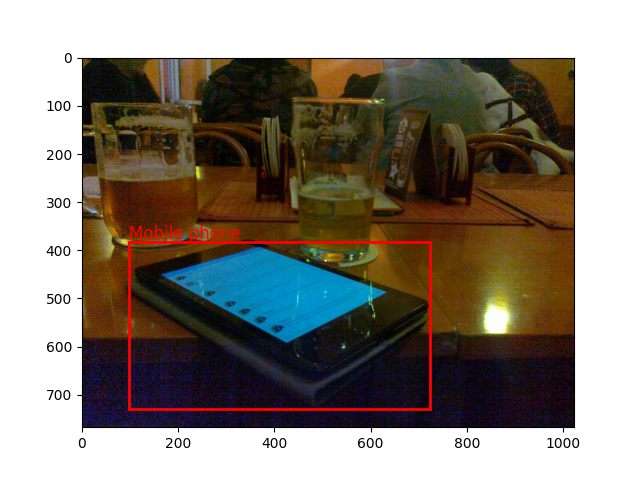

In [17]:
#Plot an example image with a bounding box for "Mobile phone"
from PIL import Image

# Define the ImageID and the corresponding image path
image_id = '0000b9115cdf1e54'
image_path = r'D:\Data 255\image_data\downloads\0000b9115cdf1e54.jpg'

# Step 1: Get the LabelName for "Mobile phone"
mobile_phone_label = class_descriptions[class_descriptions['DisplayName'] == 'Mobile phone']['LabelName'].values[0]

# Step 2: Filter the annotations to get the bounding boxes for "Mobile phone" in the given ImageID
mobile_phone_annotations = train_annotations[
    (train_annotations['ImageID'] == image_id) & (train_annotations['LabelName'] == mobile_phone_label)
]

# Step 3: Load the image
image = Image.open(image_path)
image_width, image_height = image.size

# Step 4: Plot the image with bounding boxes
fig, ax = plt.subplots(1)
ax.imshow(image)

# Step 5: Iterate through each bounding box and draw it on the image
for idx, row in mobile_phone_annotations.iterrows():
    # Convert relative coordinates to actual pixel values
    xmin = row['XMin'] * image_width
    xmax = row['XMax'] * image_width
    ymin = row['YMin'] * image_height
    ymax = row['YMax'] * image_height

    # Create a rectangle patch
    rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='red', facecolor='none')
    
    # Draw the rectangle on the image
    ax.add_patch(rect)
    
    # Add label (Mobile phone) near the bounding box
    ax.text(xmin, ymin - 5, 'Mobile phone', color='red', fontsize=12,)

# Display the plot
plt.show()